In [1]:
'''
参考
https://qiita.com/mhangyo/items/76db7c6a6ebba6cf4330

dtypeに関する資料
http://discexuno.wp.xdomain.jp/machine-learning/python_fromfile_fromstring/

3Dfigure
https://morvanzhou.github.io/tutorials/data-manipulation/plt/3-5-3d/
'''
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2 
from scipy.fftpack import fft,ifft
import os
import glob
from pylab import *
import math
import matplotlib.animation as animation

In [2]:
'''
付録ーーデータの展開法

一つの実験についてのデータは四つのフォルダーに分けております。
そのうち、「Height」と書いてるフォルダーに変異データが入ってます。
そのフォルダーの中には縦方向（Y軸）の画素分のデータファイルがあります。
一つのファイルには一行についての画像枚分のデータが横方向（X軸）の画素分重ねております。

つまり、X行、Y棚、Fフレームのデータポイントを見つけるには
Y個目のファイルを開いて、X×フレーム数（16666frames=500fps×33.3s）＋F　のインデックスでXYFのデータがあります。

データ自体は64bit doubleです。バイトオーダーはビッグエンディアンです (byte order: big endian)。ヘッダーはないです。

どうぞよろしくお願いします。
ライオン

他の設定に関する情報元(resolution/framerate/downsampling,etc)　　\\FS1\Maedalab\home\junjie-hua\wave\fourD_sensor\rawdata\20191101\Captures
'''

#f = open(r"\\FS1\Maedalab\home\junjie-hua\wave\fourD_sensor\rawdata\20191101\test1_belly\Height\Height Row 0000.data",mode='rb')#0列目
#topo = np.fromfile(f, dtype='float64',sep='').reshape(256,20000) #float64の形で読み込むと，5120000の数列ができました．bellyの計測時間=20*1000msため，256*20000とreshapeしました．x軸上のサンプリング点が256個となります．




'\n付録ーーデータの展開法\n\n一つの実験についてのデータは四つのフォルダーに分けております。\nそのうち、「Height」と書いてるフォルダーに変異データが入ってます。\nそのフォルダーの中には縦方向（Y軸）の画素分のデータファイルがあります。\n一つのファイルには一行についての画像枚分のデータが横方向（X軸）の画素分重ねております。\n\nつまり、X行、Y棚、Fフレームのデータポイントを見つけるには\nY個目のファイルを開いて、X×フレーム数（16666frames=500fps×33.3s）＋F\u3000のインデックスでXYFのデータがあります。\n\nデータ自体は64bit doubleです。バイトオーダーはビッグエンディアンです (byte order: big endian)。ヘッダーはないです。\n\nどうぞよろしくお願いします。\nライオン\n\n他の設定に関する情報元(resolution/framerate/downsampling,etc)\u3000\u3000\\FS1\\Maedalab\\home\\junjie-hua\\wave\x0courD_sensor\rawdata\x8191101\\Captures\n'

In [3]:
path = "//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//test1_belly//Height" #belly上の計測データ元　
files = os.listdir(path) #all files in the faulder　縦方向(y軸)のデータファイル
s = []
n = 0

os.chdir("//FS1//Maedalab//home//junjie-hua//wave//fourD_sensor//rawdata//20191101//test1_belly//Height") #local()関数を利用するためのコードです
for file in glob.glob("*.data"): 
    f = open(path + "//" + file ,mode='rb')#n列目　rb= read binary
    name = 'topo'+str(n)  #一つのファイルには一行についての画像枚分のデータが横方向（X軸）の画素分のデータを変数topo+str(n)に入れます
    locals()['topo'+str(n)]= np.fromfile(f, dtype='float64',sep='').reshape(256,20000) #float64の形で読み込むと，5120000の数列ができました．bellyの計測時間=20*1000msため，256*20000とreshapeしました．x軸上のサンプリング点が256個となります．
    print(file,"has ended")
    n = n + 1 
     
print(n) #y軸上サンプリング点の数を数えます--252個(なぜ256ではない？)

Height Row 0000.data has ended
Height Row 0002.data has ended
Height Row 0004.data has ended
Height Row 0006.data has ended
Height Row 0008.data has ended
Height Row 0010.data has ended
Height Row 0012.data has ended
Height Row 0014.data has ended
Height Row 0016.data has ended
Height Row 0018.data has ended
Height Row 0020.data has ended
Height Row 0022.data has ended
Height Row 0024.data has ended
Height Row 0026.data has ended
Height Row 0028.data has ended
Height Row 0030.data has ended
Height Row 0032.data has ended
Height Row 0034.data has ended
Height Row 0036.data has ended
Height Row 0038.data has ended
Height Row 0040.data has ended
Height Row 0042.data has ended
Height Row 0044.data has ended
Height Row 0046.data has ended
Height Row 0048.data has ended
Height Row 0050.data has ended
Height Row 0052.data has ended
Height Row 0054.data has ended
Height Row 0056.data has ended
Height Row 0058.data has ended
Height Row 0060.data has ended
Height Row 0062.data has ended
Height R

In [4]:
#print(topo)
#print(topo[200])
#print(topo[:1])
#print(len(topo[511]))

In [5]:
# To csv file-- to_csv.ipunbで処理することとします


start


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

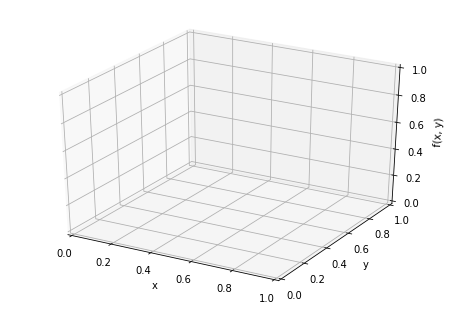

In [6]:
#時間方向に3Dグラフのアニメーション

# (x,y,1)のデータを取り出すための関数 
names = locals()
def f(x,y,t): 
    k = names['topo'+str(y)][x,t]  #topo_str(y)の数列から，(x,t)のデータを取り出します
    return k
#print(f(255,251,19999))


# X, Y value
x = np.linspace(0,256-1,256)
y = np.linspace(0,252-1,252)
X,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸256個， y軸252個



Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]

"""
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i][j] = f(j,i)
Z_array=np.array(Z)# turn list into array
Z_array = Z_array/1e50   #Z_arrayの各データが大きすぎるため，オーだーを小さくします


# 3Dグラフを作成する
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")


surface= ax.plot_surface(X, Y, Z_array, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
fig.colorbar(surface)


plt.show()
"""


fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ims = [] #image stram

print("start")
for t in range(20000):
    if y % 100 == 0:
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z[i][j] = f(j,i,t)/1e50 #データが大きすぎるため，オーだーを小さくします        
        Z_array = np.array(Z)# turn list into array
        im = ax.plot_surface(X, Y, Z_array, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
        ims.append(im)                  # グラフを配列 ims に追加
        print(t)
    else:
        skip

# 200枚のプロットを 100ms ごとに表示
ani = animation.ArtistAnimation(fig, ims, interval=100)
plt.show()

In [ ]:
'''
color map
'''

'''
#names = locals()
#k = names['topo' + str(251) ][255,5000]
#print(type(k))


# (x,y,1)のデータを取り出すための関数 
names = locals()
def f(x,y): 
    k = names['topo'+str(y)][x,1]
    #k = topo251[255,5000]
    return k

#print(f(255,251))

# X, Y value
x = np.linspace(0,256-1,256)
y = np.linspace(0,252-1,252)
X,Y = np.meshgrid(x,y)  #サンプリング点の数：x軸256個， y軸252個
#print(X.shape)
#print(Y.shape)


Z = [[0 for i in range(X.shape[1])] for i in range(Y.shape[0])]

for i in range(X.shape[0]):
    #print(i)
    for j in range(X.shape[1]):
        #print(j)
        Z[i][j] = f(j,i)

Z_array = np.array(Z)# turn list into array
#Z_array=np.log10(Z_array)
Z_array = Z_array/1e50 #Z_arrayの各データが大きすぎるため，オーだーを小さくします
#print(Z_array)




# 3Dグラフを作成する
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")


surface = ax.plot_surface(X, Y, Z_array, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
fig.colorbar(surface)


plt.show()



"""
cp = plt.contourf(X, Y, Z_array)
plt.colorbar(cp)

ax.set_title('Contour Plot')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()
"""

'''

In [ ]:
'''
color mapで見たいデータ域の詳しいFFT情報を見る
'''

"""
n=0
x=np.linspace(0,10000-1,10000)  
y=topo0[n]
yy=fft(y)                     #fft
yreal = yy.real               # real of fft
yimag = yy.imag               # imag of fft
yf=abs(fft(y))                # 
yf1=abs(fft(y))/len(x)           #normalization
yf2 = yf1[range(int(len(x)/2))]  #
xf = np.arange(len(y))        # frequency
xf1 = xf
xf2 = xf[range(int(len(x)/2))]  #half

plt.subplot(211)
plt.plot(topo0[n])#n-1行目，0~10000flame 
plt.title('Original wave')
plt.subplot(212)
plt.plot(xf2,yf2,'b')
plt.title('FFT )',fontsize=10,color='#F08080')

plt.show()
"""

In [ ]:
print("end")